#Model Architecture Builder Code

In [1]:
# https://keras.io/
!pip install -q keras
import tensorflow as tf
import keras
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Concatenate
from tensorflow.keras.optimizers import Adam
from keras.layers import Reshape, Activation, Conv2D, Input, MaxPooling2D, BatchNormalization, Flatten, Dense, Lambda
from keras.layers.merge import concatenate
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping
from keras.models import load_model
from keras.callbacks import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# this part will prevent tensorflow to allocate all the avaliable GPU Memory
# backend
import tensorflow as tf
from keras import backend as k

# Don't pre-allocate memory; allocate as-needed
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True

# Create a session with the above options specified.
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# Hyperparameters

# number of classes
num_classes = 200
# input image dimensions
img_height, img_width = 32, 32
# The images are RGB.
img_channels = 3

In [2]:
def space_to_depth_x2(x):
    import tensorflow as tf
    return tf.nn.space_to_depth(x, block_size=2)

In [3]:
input = Input(shape=(None, None, img_channels))

# Block 1

layer1 = Conv2D(32, (3,3), strides=(1,1), padding='same', name='conv_1', use_bias=False)(input)
layer1 = BatchNormalization(name='norm_1')(layer1)
layer1 = Activation("relu")(layer1)

layer2 = Conv2D(64, (3,3), strides=(1,1), padding='same', name='conv_2', use_bias=False)(layer1)
layer2 = BatchNormalization(name='norm_2')(layer2)
layer2 = Activation("relu")(layer2)

layer3 = Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_3', use_bias=False)(layer2)
layer3 = BatchNormalization(name='norm_3')(layer3)
layer3 = Activation("relu")(layer3)

layer4 = Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_4', use_bias=False)(layer3)
layer4 = BatchNormalization(name='norm_4')(layer4)
layer4 = Activation("relu")(layer4)

layer5 = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_5', use_bias=False)(layer4)
layer5 = BatchNormalization(name='norm_5')(layer5)
layer5 = Activation("relu")(layer5)

layer6 = MaxPooling2D(pool_size=(2, 2))(layer5)

skip_connection_1 = layer6

# Block 2

layer7 = Conv2D(64, (3,3), strides=(1,1), padding='same', name='conv_7', use_bias=False)(layer6)
layer7 = BatchNormalization(name='norm_7')(layer7)
layer7 = Activation("relu")(layer7)

layer8 = Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_8', use_bias=False)(layer7)
layer8 = BatchNormalization(name='norm_8')(layer8)
layer8 = Activation("relu")(layer8)

layer9 = Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_9', use_bias=False)(layer8)
layer9 = BatchNormalization(name='norm_9')(layer9)
layer9 = Activation("relu")(layer9)

layer10 = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_10', use_bias=False)(layer9)
layer10 = BatchNormalization(name='norm_10')(layer10)
layer10 = Activation("relu")(layer10)

layer11 = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_11', use_bias=False)(layer10)
layer11 = BatchNormalization(name='norm_11')(layer11)
layer11 = Activation("relu")(layer11)

layer12 = MaxPooling2D(pool_size=(2, 2))(layer11)

skip_connection_1 = Lambda(space_to_depth_x2)(skip_connection_1)

layer13 = concatenate([skip_connection_1, layer12])

skip_connection_2 = layer13

# Block 3

layer14 = Conv2D(32, (3,3), strides=(1,1), padding='same', name='conv_14', use_bias=False)(layer13)
layer14 = BatchNormalization(name='norm_14')(layer14)
layer14 = Activation("relu")(layer14)

layer15 = Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_15', use_bias=False)(layer14)
layer15 = BatchNormalization(name='norm_15')(layer15)
layer15 = Activation("relu")(layer15)

layer16 = Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_16', use_bias=False)(layer15)
layer16 = BatchNormalization(name='norm_16')(layer16)
layer16 = Activation("relu")(layer16)

layer17 = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_17', use_bias=False)(layer16)
layer17 = BatchNormalization(name='norm_17')(layer17)
layer17 = Activation("relu")(layer17)

layer18 = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_18', use_bias=False)(layer17)
layer18 = BatchNormalization(name='norm_18')(layer18)
layer18 = Activation("relu")(layer18)

layer19 = MaxPooling2D(pool_size=(2, 2))(layer18)

skip_connection_2 = Lambda(space_to_depth_x2)(skip_connection_2)

layer20 = concatenate([skip_connection_2, layer19])

layer21 = Conv2D(num_classes, (1,1), name='conv_21', use_bias=False)(layer20)
layer21 = BatchNormalization(name='norm_21')(layer21)

layer22 = GlobalAveragePooling2D(data_format=None)(layer21)

layer23 = Activation('softmax')(layer22)

output = layer23


#Import Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip
!unzip -qq 'tiny-imagenet-200.zip'

--2021-12-21 02:36:50--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.68.10
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M  58.1MB/s    in 4.1s    

2021-12-21 02:36:54 (57.0 MB/s) - ‘tiny-imagenet-200.zip’ saved [248100043/248100043]



In [6]:
val_data = pd.read_csv('./tiny-imagenet-200/val/val_annotations.txt', sep='\t', header=None, names=['File', 'Class', 'X', 'Y', 'H', 'W'])
val_data.drop(['X', 'Y', 'H', 'W'], axis=1, inplace=True)
val_data.head(3)

,File,Class
0,val_0.JPEG,n03444034
1,val_1.JPEG,n04067472
2,val_2.JPEG,n04070727


In [7]:
train_datagen = ImageDataGenerator(
    rescale= 1./255)

valid_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory( r'./tiny-imagenet-200/train/', target_size=(32, 32), color_mode='rgb', 
                                                    batch_size=256, class_mode='categorical', shuffle=True, seed=42)

Found 100000 images belonging to 200 classes.


In [9]:
validation_generator = valid_datagen.flow_from_dataframe(val_data, directory='./tiny-imagenet-200/val/images/', x_col='File', y_col='Class', target_size=(64, 64),
                                                    color_mode='rgb', class_mode='categorical', batch_size=256, shuffle=True, seed=42)

Found 10000 validated image filenames belonging to 200 classes.


#Model

In [10]:
model = Model(inputs=[input], outputs=[output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv_1 (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 norm_1 (BatchNormalization)    (None, None, None,   128         ['conv_1[0][0]']                 
                                32)                                                           

In [11]:
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Model Training

In [12]:
history1=model.fit(train_generator, epochs=15, steps_per_epoch=100000//256, validation_steps=10000//256, validation_data=validation_generator, verbose=1, callbacks=[lr_reducer])

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_1.h5')
pd.DataFrame(history1.history).to_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model1.csv')

Epoch 1/15
390/390 [==============================] - 170s 394ms/step - loss: 4.2713 - accuracy: 0.1258 - val_loss: 5.1550 - val_accuracy: 0.0487 - lr: 0.0010
Epoch 2/15
390/390 [==============================] - 146s 375ms/step - loss: 3.5692 - accuracy: 0.2302 - val_loss: 4.4332 - val_accuracy: 0.0897 - lr: 0.0010
Epoch 3/15
390/390 [==============================] - 146s 375ms/step - loss: 3.1631 - accuracy: 0.2970 - val_loss: 3.9166 - val_accuracy: 0.1677 - lr: 0.0010
Epoch 4/15
390/390 [==============================] - 146s 374ms/step - loss: 2.8465 - accuracy: 0.3530 - val_loss: 4.3745 - val_accuracy: 0.1119 - lr: 0.0010
Epoch 5/15
390/390 [==============================] - 146s 375ms/step - loss: 2.5784 - accuracy: 0.4023 - val_loss: 4.0386 - val_accuracy: 0.1441 - lr: 0.0010
Epoch 6/15
390/390 [==============================] - 152s 389ms/step - loss: 2.3338 - accuracy: 0.4521 - val_loss: 4.0332 - val_accuracy: 0.1614 - lr: 0.0010
Epoch 7/15
390/390 [==========================

In [13]:
train_generator = train_datagen.flow_from_directory( r'./tiny-imagenet-200/train/', target_size=(64, 64), color_mode='rgb', 
                                                    batch_size=64, class_mode='categorical', shuffle=True, seed=42)

Found 100000 images belonging to 200 classes.


In [14]:
validation_generator = valid_datagen.flow_from_dataframe(val_data, directory='./tiny-imagenet-200/val/images/', x_col='File', y_col='Class', target_size=(64, 64),
                                                    color_mode='rgb', class_mode='categorical', batch_size=64, shuffle=True, seed=42)

Found 10000 validated image filenames belonging to 200 classes.


In [16]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_1.h5')

history2=model.fit(train_generator, epochs=15, steps_per_epoch=200, validation_steps=10000//64, validation_data=validation_generator, verbose=1, callbacks=[lr_reducer])

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_2.h5') 
pd.DataFrame(history2.history).to_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model2.csv')

Epoch 1/15
200/200 [==============================] - 84s 417ms/step - loss: 2.9748 - accuracy: 0.3212 - val_loss: 4.1721 - val_accuracy: 0.1995 - lr: 0.0010
Epoch 2/15
200/200 [==============================] - 86s 428ms/step - loss: 2.5487 - accuracy: 0.4029 - val_loss: 3.7766 - val_accuracy: 0.2230 - lr: 0.0010
Epoch 3/15
200/200 [==============================] - 82s 412ms/step - loss: 2.3910 - accuracy: 0.4384 - val_loss: 3.2562 - val_accuracy: 0.2952 - lr: 0.0010
Epoch 4/15
200/200 [==============================] - 82s 411ms/step - loss: 2.2610 - accuracy: 0.4649 - val_loss: 3.1244 - val_accuracy: 0.3076 - lr: 0.0010
Epoch 5/15
200/200 [==============================] - 82s 410ms/step - loss: 2.1745 - accuracy: 0.4833 - val_loss: 3.0794 - val_accuracy: 0.3197 - lr: 0.0010
Epoch 6/15
200/200 [==============================] - 86s 433ms/step - loss: 2.1171 - accuracy: 0.4974 - val_loss: 2.9002 - val_accuracy: 0.3410 - lr: 0.0010
Epoch 7/15
200/200 [==============================] 

In [17]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_2.h5')

history3=model.fit(train_generator, epochs=15, steps_per_epoch=200, validation_steps=10000//64, validation_data=validation_generator, verbose=1)

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_3.h5')  # creates a HDF5 file 'my_model.h5'
pd.DataFrame(history3.history).to_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model3.csv')

Epoch 1/15
200/200 [==============================] - 83s 412ms/step - loss: 1.5888 - accuracy: 0.6180 - val_loss: 2.7009 - val_accuracy: 0.3896
Epoch 2/15
200/200 [==============================] - 82s 409ms/step - loss: 1.5946 - accuracy: 0.6123 - val_loss: 2.5467 - val_accuracy: 0.4172
Epoch 3/15
200/200 [==============================] - 82s 410ms/step - loss: 1.5407 - accuracy: 0.6293 - val_loss: 2.5277 - val_accuracy: 0.4219
Epoch 4/15
200/200 [==============================] - 82s 410ms/step - loss: 1.4780 - accuracy: 0.6445 - val_loss: 2.4343 - val_accuracy: 0.4320
Epoch 5/15
200/200 [==============================] - 86s 431ms/step - loss: 1.4529 - accuracy: 0.6503 - val_loss: 2.5038 - val_accuracy: 0.4274
Epoch 6/15
200/200 [==============================] - 82s 410ms/step - loss: 1.4068 - accuracy: 0.6623 - val_loss: 2.4901 - val_accuracy: 0.4383
Epoch 7/15
200/200 [==============================] - 82s 410ms/step - loss: 1.4044 - accuracy: 0.6641 - val_loss: 2.4247 - val_ac

In [18]:
train_generator = train_datagen.flow_from_directory( r'./tiny-imagenet-200/train/', target_size=(16, 16), color_mode='rgb', 
                                                    batch_size=256, class_mode='categorical', shuffle=True, seed=42)

Found 100000 images belonging to 200 classes.


In [19]:
validation_generator = valid_datagen.flow_from_dataframe(val_data, directory='./tiny-imagenet-200/val/images/', x_col='File', y_col='Class', target_size=(64, 64),
                                                    color_mode='rgb', class_mode='categorical', batch_size=256, shuffle=True, seed=42)

Found 10000 validated image filenames belonging to 200 classes.


In [20]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_3.h5')

history4=model.fit_generator(train_generator, epochs=10, steps_per_epoch=200, validation_steps=10000//256, validation_data=validation_generator, verbose=1)

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_4.h5')  # creates a HDF5 file 'my_model.h5'
pd.DataFrame(history4.history).to_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model4.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
200/200 [==============================] - 48s 233ms/step - loss: 3.7282 - accuracy: 0.2223 - val_loss: 3.8960 - val_accuracy: 0.1880
Epoch 2/10
200/200 [==============================] - 46s 229ms/step - loss: 2.7125 - accuracy: 0.3699 - val_loss: 4.0590 - val_accuracy: 0.1640
Epoch 3/10
200/200 [==============================] - 45s 226ms/step - loss: 2.3094 - accuracy: 0.4550 - val_loss: 4.2523 - val_accuracy: 0.1403
Epoch 4/10
200/200 [==============================] - 46s 228ms/step - loss: 1.9273 - accuracy: 0.5402 - val_loss: 4.2029 - val_accuracy: 0.1530
Epoch 5/10
200/200 [==============================] - 45s 226ms/step - loss: 1.5781 - accuracy: 0.6234 - val_loss: 4.3929 - val_accuracy: 0.1347
Epoch 6/10
200/200 [==============================] - 45s 227ms/step - loss: 1.2449 - accuracy: 0.7131 - val_loss: 4.1044 - val_accuracy: 0.1694
Epoch 7/10
200/200 [==============================] - 45s 227ms/step - loss: 0.9593 - accuracy: 0.7876 - val_loss: 4.2875 - val_ac

In [21]:
train_generator = train_datagen.flow_from_directory( r'./tiny-imagenet-200/train/', target_size=(64, 64), color_mode='rgb', 
                                                    batch_size=64, class_mode='categorical', shuffle=True, seed=42)

Found 100000 images belonging to 200 classes.


In [22]:
validation_generator = valid_datagen.flow_from_dataframe(val_data, directory='./tiny-imagenet-200/val/images/', x_col='File', y_col='Class', target_size=(64, 64),
                                                    color_mode='rgb', class_mode='categorical', batch_size=64, shuffle=True, seed=42)

Found 10000 validated image filenames belonging to 200 classes.


In [23]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_4.h5')

history5=model.fit_generator(train_generator, epochs=15, steps_per_epoch=200, validation_steps=10000//64, validation_data=validation_generator, verbose=1)

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_5.h5')  # creates a HDF5 file 'my_model.h5'
pd.DataFrame(history5.history).to_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model5.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/15
200/200 [==============================] - 84s 413ms/step - loss: 1.6831 - accuracy: 0.5858 - val_loss: 3.0345 - val_accuracy: 0.3328
Epoch 2/15
200/200 [==============================] - 82s 409ms/step - loss: 1.3994 - accuracy: 0.6573 - val_loss: 2.3701 - val_accuracy: 0.4507
Epoch 3/15
200/200 [==============================] - 82s 410ms/step - loss: 1.2925 - accuracy: 0.6860 - val_loss: 2.5275 - val_accuracy: 0.4311
Epoch 4/15
200/200 [==============================] - 82s 409ms/step - loss: 1.1837 - accuracy: 0.7123 - val_loss: 2.4276 - val_accuracy: 0.4424
Epoch 5/15
200/200 [==============================] - 82s 411ms/step - loss: 1.1321 - accuracy: 0.7227 - val_loss: 2.2899 - val_accuracy: 0.4733
Epoch 6/15
200/200 [==============================] - 82s 410ms/step - loss: 1.0656 - accuracy: 0.7447 - val_loss: 2.3923 - val_accuracy: 0.4529
Epoch 7/15
200/200 [==============================] - 82s 409ms/step - loss: 1.0535 - accuracy: 0.7518 - val_loss: 2.2893 - val_ac

#Image Augmentation

In [24]:
from imgaug import augmenters as iaa

seq = iaa.SomeOf((0, None), [iaa.Affine(scale=(0.5, 1.5)), iaa.Affine(rotate=20),
    iaa.CoarseDropout((0.0, 0.2), size_percent=(0.05, 0.07)), iaa.AdditiveGaussianNoise(scale=0.05*255), iaa.CropAndPad(percent=(-0.25, 0.25))
     ])

train_datagen = ImageDataGenerator(preprocessing_function=seq.augment_image, rescale=1./255)

valid_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
train_generator = train_datagen.flow_from_directory( r'./tiny-imagenet-200/train/', target_size=(64, 64), color_mode='rgb', 
                                                    batch_size=64, class_mode='categorical', shuffle=True, seed=42)

Found 100000 images belonging to 200 classes.


In [26]:
validation_generator = valid_datagen.flow_from_dataframe(val_data, directory='./tiny-imagenet-200/val/images/', x_col='File', y_col='Class', target_size=(64, 64),
                                                    color_mode='rgb', class_mode='categorical', batch_size=64, shuffle=True, seed=42)

Found 10000 validated image filenames belonging to 200 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


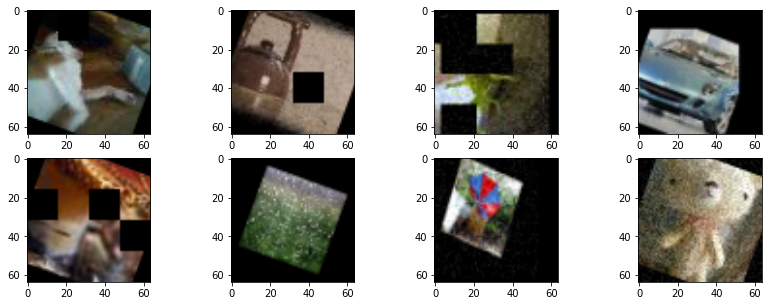

In [27]:
x_batch, y_batch = next(train_generator)

fig = plt.figure(figsize=(14, 5))

for i in range(8):
    sub = fig.add_subplot(2, 4, i + 1)
    sub.imshow(x_batch[i,:,:], interpolation='bilinear')

In [28]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_5.h5')

history6=model.fit_generator(train_generator, epochs=15, steps_per_epoch=200, validation_steps=10000//64, validation_data=validation_generator, verbose=1)

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_6.h5')
pd.DataFrame(history6.history).to_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model6.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/15
200/200 [==============================] - 121s 600ms/step - loss: 2.8133 - accuracy: 0.3664 - val_loss: 3.1221 - val_accuracy: 0.3704
Epoch 2/15
200/200 [==============================] - 120s 598ms/step - loss: 2.5344 - accuracy: 0.4084 - val_loss: 3.1055 - val_accuracy: 0.3718
Epoch 3/15
200/200 [==============================] - 119s 593ms/step - loss: 2.4139 - accuracy: 0.4313 - val_loss: 2.8993 - val_accuracy: 0.3869
Epoch 4/15
200/200 [==============================] - 120s 597ms/step - loss: 2.3754 - accuracy: 0.4356 - val_loss: 2.5764 - val_accuracy: 0.4317
Epoch 5/15
200/200 [==============================] - 119s 593ms/step - loss: 2.3256 - accuracy: 0.4497 - val_loss: 2.5249 - val_accuracy: 0.4299
Epoch 6/15
200/200 [==============================] - 119s 597ms/step - loss: 2.2658 - accuracy: 0.4616 - val_loss: 2.6572 - val_accuracy: 0.4258
Epoch 7/15
200/200 [==============================] - 120s 599ms/step - loss: 2.2370 - accuracy: 0.4687 - val_loss: 2.9338 -

In [29]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_6.h5')

history7=model.fit_generator(train_generator, epochs=15, steps_per_epoch=200, validation_steps=10000//64, validation_data=validation_generator, verbose=1)

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_7.h5')
pd.DataFrame(history7.history).to_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model7.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/15
200/200 [==============================] - 126s 625ms/step - loss: 2.0866 - accuracy: 0.4998 - val_loss: 2.4439 - val_accuracy: 0.4556
Epoch 2/15
200/200 [==============================] - 120s 599ms/step - loss: 2.0838 - accuracy: 0.5005 - val_loss: 2.8237 - val_accuracy: 0.3985
Epoch 3/15
200/200 [==============================] - 119s 597ms/step - loss: 2.0272 - accuracy: 0.5086 - val_loss: 2.3173 - val_accuracy: 0.4744
Epoch 4/15
200/200 [==============================] - 119s 594ms/step - loss: 2.0537 - accuracy: 0.5070 - val_loss: 2.3416 - val_accuracy: 0.4713
Epoch 5/15
200/200 [==============================] - 119s 595ms/step - loss: 2.0262 - accuracy: 0.5132 - val_loss: 2.3704 - val_accuracy: 0.4686
Epoch 6/15
200/200 [==============================] - 118s 590ms/step - loss: 2.0343 - accuracy: 0.5125 - val_loss: 2.3533 - val_accuracy: 0.4611
Epoch 7/15
200/200 [==============================] - 119s 595ms/step - loss: 1.9850 - accuracy: 0.5219 - val_loss: 2.5427 -

In [30]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_7.h5')

history8=model.fit_generator(train_generator, epochs=15, steps_per_epoch=200, validation_steps=10000//64, validation_data=validation_generator, verbose=1)

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_8.h5')
pd.DataFrame(history8.history).to_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model8.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/15
200/200 [==============================] - 119s 590ms/step - loss: 1.9042 - accuracy: 0.5371 - val_loss: 2.4392 - val_accuracy: 0.4629
Epoch 2/15
200/200 [==============================] - 119s 594ms/step - loss: 1.9069 - accuracy: 0.5327 - val_loss: 2.3326 - val_accuracy: 0.4715
Epoch 3/15
200/200 [==============================] - 122s 609ms/step - loss: 1.9131 - accuracy: 0.5392 - val_loss: 2.3612 - val_accuracy: 0.4767
Epoch 4/15
200/200 [==============================] - 119s 594ms/step - loss: 1.8780 - accuracy: 0.5436 - val_loss: 2.3649 - val_accuracy: 0.4714
Epoch 5/15
200/200 [==============================] - 120s 597ms/step - loss: 1.8731 - accuracy: 0.5452 - val_loss: 2.2945 - val_accuracy: 0.4816
Epoch 6/15
200/200 [==============================] - 120s 597ms/step - loss: 1.8550 - accuracy: 0.5537 - val_loss: 2.4236 - val_accuracy: 0.4762
Epoch 7/15
200/200 [==============================] - 121s 604ms/step - loss: 1.8550 - accuracy: 0.5490 - val_loss: 2.3357 -

In [31]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_8.h5')

history9=model.fit_generator(train_generator, epochs=15, steps_per_epoch=200, validation_steps=10000//64, validation_data=validation_generator, verbose=1)

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_9.h5')
pd.DataFrame(history9.history).to_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model9.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/15
200/200 [==============================] - 122s 604ms/step - loss: 1.7985 - accuracy: 0.5575 - val_loss: 2.5160 - val_accuracy: 0.4525
Epoch 2/15
200/200 [==============================] - 120s 599ms/step - loss: 1.7979 - accuracy: 0.5641 - val_loss: 2.3894 - val_accuracy: 0.4609
Epoch 3/15
200/200 [==============================] - 119s 596ms/step - loss: 1.7864 - accuracy: 0.5663 - val_loss: 2.3749 - val_accuracy: 0.4704
Epoch 4/15
200/200 [==============================] - 119s 593ms/step - loss: 1.7666 - accuracy: 0.5669 - val_loss: 2.3170 - val_accuracy: 0.4802
Epoch 5/15
200/200 [==============================] - 119s 596ms/step - loss: 1.7391 - accuracy: 0.5749 - val_loss: 2.1050 - val_accuracy: 0.5133
Epoch 6/15
200/200 [==============================] - 120s 598ms/step - loss: 1.7759 - accuracy: 0.5656 - val_loss: 2.2247 - val_accuracy: 0.4977
Epoch 7/15
200/200 [==============================] - 119s 593ms/step - loss: 1.7328 - accuracy: 0.5766 - val_loss: 2.3908 -

In [32]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_9.h5')

history10=model.fit_generator(train_generator, epochs=15, steps_per_epoch=200, validation_steps=10000//64, validation_data=validation_generator, verbose=1)

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_10.h5')
pd.DataFrame(history10.history).to_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model10.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/15
200/200 [==============================] - 120s 596ms/step - loss: 1.6813 - accuracy: 0.5823 - val_loss: 2.3079 - val_accuracy: 0.4788
Epoch 2/15
200/200 [==============================] - 123s 616ms/step - loss: 1.6549 - accuracy: 0.5934 - val_loss: 2.2445 - val_accuracy: 0.4962
Epoch 3/15
200/200 [==============================] - 120s 601ms/step - loss: 1.6540 - accuracy: 0.5915 - val_loss: 2.2161 - val_accuracy: 0.5011
Epoch 4/15
200/200 [==============================] - 121s 604ms/step - loss: 1.6479 - accuracy: 0.5934 - val_loss: 2.3859 - val_accuracy: 0.4847
Epoch 5/15
200/200 [==============================] - 120s 602ms/step - loss: 1.6684 - accuracy: 0.5910 - val_loss: 2.3293 - val_accuracy: 0.4826
Epoch 6/15
200/200 [==============================] - 121s 602ms/step - loss: 1.6535 - accuracy: 0.5941 - val_loss: 2.4326 - val_accuracy: 0.4648
Epoch 7/15
200/200 [==============================] - 120s 598ms/step - loss: 1.6580 - accuracy: 0.5935 - val_loss: 2.3015 -

In [33]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_10.h5')

history11=model.fit_generator(train_generator, epochs=15, steps_per_epoch=200, validation_steps=10000//64, validation_data=validation_generator, verbose=1)

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_11.h5')
pd.DataFrame(history11.history).to_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model11.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/15
200/200 [==============================] - 120s 593ms/step - loss: 1.5886 - accuracy: 0.6093 - val_loss: 2.1602 - val_accuracy: 0.5126
Epoch 2/15
200/200 [==============================] - 118s 588ms/step - loss: 1.5754 - accuracy: 0.6143 - val_loss: 2.2928 - val_accuracy: 0.4931
Epoch 3/15
200/200 [==============================] - 120s 598ms/step - loss: 1.5729 - accuracy: 0.6127 - val_loss: 2.0769 - val_accuracy: 0.5283
Epoch 4/15
200/200 [==============================] - 119s 595ms/step - loss: 1.5540 - accuracy: 0.6152 - val_loss: 2.2049 - val_accuracy: 0.5047
Epoch 5/15
200/200 [==============================] - 118s 587ms/step - loss: 1.5354 - accuracy: 0.6231 - val_loss: 2.1501 - val_accuracy: 0.5110
Epoch 6/15
200/200 [==============================] - 119s 592ms/step - loss: 1.5630 - accuracy: 0.6094 - val_loss: 2.3451 - val_accuracy: 0.4798
Epoch 7/15
200/200 [==============================] - 118s 591ms/step - loss: 1.5295 - accuracy: 0.6242 - val_loss: 2.2866 -

In [34]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_11.h5')

history12=model.fit_generator(train_generator, epochs=15, steps_per_epoch=200, validation_steps=10000//64, validation_data=validation_generator, verbose=1)

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_12.h5')
pd.DataFrame(history12.history).to_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model12.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/15
200/200 [==============================] - 122s 605ms/step - loss: 1.5033 - accuracy: 0.6244 - val_loss: 2.2776 - val_accuracy: 0.4959
Epoch 2/15
200/200 [==============================] - 120s 600ms/step - loss: 1.5096 - accuracy: 0.6250 - val_loss: 2.2270 - val_accuracy: 0.5110
Epoch 3/15
200/200 [==============================] - 120s 601ms/step - loss: 1.4903 - accuracy: 0.6255 - val_loss: 2.1539 - val_accuracy: 0.5197
Epoch 4/15
200/200 [==============================] - 119s 593ms/step - loss: 1.4665 - accuracy: 0.6378 - val_loss: 2.3366 - val_accuracy: 0.4843
Epoch 5/15
200/200 [==============================] - 119s 596ms/step - loss: 1.4824 - accuracy: 0.6334 - val_loss: 2.1685 - val_accuracy: 0.5176
Epoch 6/15
200/200 [==============================] - 119s 595ms/step - loss: 1.4548 - accuracy: 0.6416 - val_loss: 2.2732 - val_accuracy: 0.4897
Epoch 7/15
200/200 [==============================] - 119s 593ms/step - loss: 1.4649 - accuracy: 0.6335 - val_loss: 2.3606 -

In [35]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_12.h5')

history13=model.fit_generator(train_generator, epochs=15, steps_per_epoch=200, validation_steps=10000//64, validation_data=validation_generator, verbose=1, callbacks=[lr_reducer])

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_13.h5')
pd.DataFrame(history13.history).to_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model13.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/15
200/200 [==============================] - 122s 603ms/step - loss: 1.3996 - accuracy: 0.6488 - val_loss: 2.1038 - val_accuracy: 0.5280 - lr: 0.0010
Epoch 2/15
200/200 [==============================] - 120s 599ms/step - loss: 1.4173 - accuracy: 0.6466 - val_loss: 2.1250 - val_accuracy: 0.5267 - lr: 0.0010
Epoch 3/15
200/200 [==============================] - 120s 600ms/step - loss: 1.4136 - accuracy: 0.6520 - val_loss: 2.2396 - val_accuracy: 0.5118 - lr: 0.0010
Epoch 4/15
200/200 [==============================] - 119s 592ms/step - loss: 1.3841 - accuracy: 0.6529 - val_loss: 2.2024 - val_accuracy: 0.5088 - lr: 0.0010
Epoch 5/15
200/200 [==============================] - 119s 596ms/step - loss: 1.3851 - accuracy: 0.6525 - val_loss: 2.3938 - val_accuracy: 0.4889 - lr: 0.0010
Epoch 6/15
200/200 [==============================] - 118s 589ms/step - loss: 1.3891 - accuracy: 0.6538 - val_loss: 2.1641 - val_accuracy: 0.5217 - lr: 0.0010
Epoch 7/15
200/200 [==========================

In [36]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_13.h5')

history14=model.fit_generator(train_generator, epochs=15, steps_per_epoch=200, validation_steps=10000//64, validation_data=validation_generator, verbose=1, callbacks=[lr_reducer])

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_14.h5')
pd.DataFrame(history14.history).to_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model14.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/15
200/200 [==============================] - 121s 598ms/step - loss: 1.0818 - accuracy: 0.7307 - val_loss: 1.7157 - val_accuracy: 0.6002 - lr: 1.0000e-04
Epoch 2/15
200/200 [==============================] - 119s 595ms/step - loss: 1.0885 - accuracy: 0.7299 - val_loss: 1.7184 - val_accuracy: 0.5987 - lr: 1.0000e-04
Epoch 3/15
200/200 [==============================] - 118s 591ms/step - loss: 1.1016 - accuracy: 0.7256 - val_loss: 1.7117 - val_accuracy: 0.5980 - lr: 1.0000e-04
Epoch 4/15
200/200 [==============================] - 120s 598ms/step - loss: 1.0727 - accuracy: 0.7347 - val_loss: 1.7253 - val_accuracy: 0.5993 - lr: 1.0000e-04
Epoch 5/15
200/200 [==============================] - 117s 583ms/step - loss: 1.0702 - accuracy: 0.7334 - val_loss: 1.7130 - val_accuracy: 0.6000 - lr: 1.0000e-04
Epoch 6/15
200/200 [==============================] - 117s 584ms/step - loss: 1.0476 - accuracy: 0.7415 - val_loss: 1.7137 - val_accuracy: 0.5970 - lr: 1.0000e-04
Epoch 7/15
200/200 [==

In [37]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_14.h5')

history15=model.fit_generator(train_generator, epochs=15, steps_per_epoch=200, validation_steps=10000//64, validation_data=validation_generator, verbose=1, callbacks=[lr_reducer])

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_15.h5')
pd.DataFrame(history15.history).to_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model15.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/15
200/200 [==============================] - 121s 600ms/step - loss: 1.0159 - accuracy: 0.7503 - val_loss: 1.6959 - val_accuracy: 0.6041 - lr: 3.1623e-05
Epoch 2/15
200/200 [==============================] - 120s 602ms/step - loss: 1.0526 - accuracy: 0.7433 - val_loss: 1.6970 - val_accuracy: 0.6076 - lr: 3.1623e-05
Epoch 3/15
200/200 [==============================] - 120s 600ms/step - loss: 1.0454 - accuracy: 0.7429 - val_loss: 1.6952 - val_accuracy: 0.6065 - lr: 3.1623e-05
Epoch 4/15
200/200 [==============================] - 120s 601ms/step - loss: 1.0254 - accuracy: 0.7437 - val_loss: 1.6985 - val_accuracy: 0.6046 - lr: 3.1623e-05
Epoch 5/15
200/200 [==============================] - 120s 602ms/step - loss: 1.0120 - accuracy: 0.7539 - val_loss: 1.6945 - val_accuracy: 0.6054 - lr: 3.1623e-05
Epoch 6/15
200/200 [==============================] - 120s 599ms/step - loss: 1.0342 - accuracy: 0.7477 - val_loss: 1.6950 - val_accuracy: 0.6057 - lr: 3.1623e-05
Epoch 7/15
200/200 [==

In [38]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_15.h5')

history16=model.fit_generator(train_generator, epochs=15, steps_per_epoch=200, validation_steps=10000//64, validation_data=validation_generator, verbose=1, callbacks=[lr_reducer])

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_16.h5')
pd.DataFrame(history16.history).to_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model16.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/15
200/200 [==============================] - 123s 607ms/step - loss: 1.0165 - accuracy: 0.7505 - val_loss: 1.6946 - val_accuracy: 0.6063 - lr: 1.0000e-05
Epoch 2/15
200/200 [==============================] - 120s 598ms/step - loss: 1.0019 - accuracy: 0.7510 - val_loss: 1.6955 - val_accuracy: 0.6061 - lr: 1.0000e-05
Epoch 3/15
200/200 [==============================] - 119s 597ms/step - loss: 0.9956 - accuracy: 0.7542 - val_loss: 1.6928 - val_accuracy: 0.6047 - lr: 1.0000e-05
Epoch 4/15
200/200 [==============================] - 120s 600ms/step - loss: 1.0155 - accuracy: 0.7538 - val_loss: 1.6927 - val_accuracy: 0.6061 - lr: 1.0000e-05
Epoch 5/15
200/200 [==============================] - 119s 597ms/step - loss: 0.9956 - accuracy: 0.7588 - val_loss: 1.6927 - val_accuracy: 0.6074 - lr: 1.0000e-05
Epoch 6/15
200/200 [==============================] - 119s 595ms/step - loss: 1.0123 - accuracy: 0.7543 - val_loss: 1.6910 - val_accuracy: 0.6076 - lr: 1.0000e-05
Epoch 7/15
200/200 [==

In [48]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/EIP Models/best.h5', monitor='accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)

In [49]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_16.h5')

history17 = model.fit(train_generator, epochs=10, steps_per_epoch=200, validation_steps=10000//64, validation_data=validation_generator, verbose=1, callbacks=[lr_reducer, checkpoint])

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_17.h5')
pd.DataFrame(history17.history).to_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model17.csv')

Epoch 1/10

Epoch 00001: accuracy improved from -inf to 0.82812, saving model to /content/drive/My Drive/Colab Notebooks/EIP Models/best.h5
  1/200 [..............................] - ETA: 15:15 - loss: 0.7968 - accuracy: 0.8281
Epoch 00001: accuracy did not improve from 0.82812
  2/200 [..............................] - ETA: 1:09 - loss: 0.8315 - accuracy: 0.8203 
Epoch 00001: accuracy did not improve from 0.82812
  3/200 [..............................] - ETA: 2:25 - loss: 0.8769 - accuracy: 0.7760
Epoch 00001: accuracy did not improve from 0.82812
  4/200 [..............................] - ETA: 2:57 - loss: 0.8986 - accuracy: 0.7773
Epoch 00001: accuracy did not improve from 0.82812
  5/200 [..............................] - ETA: 2:35 - loss: 0.8476 - accuracy: 0.7906
Epoch 00001: accuracy did not improve from 0.82812
  6/200 [..............................] - ETA: 2:23 - loss: 0.8626 - accuracy: 0.7943
Epoch 00001: accuracy did not improve from 0.82812
  7/200 [>....................

#Model Evaluation

In [50]:
valid_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = valid_datagen.flow_from_dataframe(val_data, directory='./tiny-imagenet-200/val/images/', x_col='File', y_col='Class', target_size=(64, 64),
                                                    color_mode='rgb', class_mode='categorical', batch_size=64, shuffle=True, seed=42)

Found 10000 validated image filenames belonging to 200 classes.


In [51]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/best.h5')

validation_steps_per_epoch = np.math.ceil(validation_generator.samples / validation_generator.batch_size)

score = model.evaluate_generator(validation_generator, verbose=1, steps=validation_steps_per_epoch)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """


157/157 [==============================] - 18s 110ms/step - loss: 1.6919 - accuracy: 0.6067
Test loss: 1.6919444799423218
Test accuracy: 0.6067000031471252


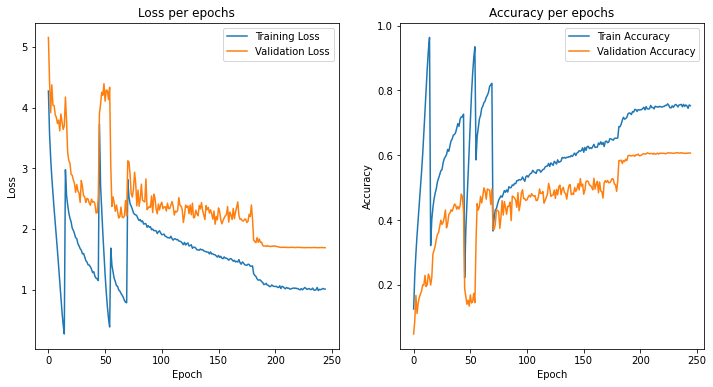

In [53]:
hist1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model1.csv')
hist2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model2.csv')
hist3 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model3.csv')
hist4 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model4.csv')
hist5 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model5.csv')
hist6 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model6.csv')
hist7 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model7.csv')
hist8 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model8.csv')
hist9 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model9.csv')
hist10 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model10.csv')
hist11 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model11.csv')
hist12 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model12.csv')
hist13 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model13.csv')
hist14 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model14.csv')
hist15 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model15.csv')
hist16 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model16.csv')
hist17 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EIP Models/network1_model17.csv')

history = hist1.append([hist2,hist3, hist4, hist5, hist6,hist7,hist8,hist9,
                           hist10,hist11,hist12,hist13,hist14,hist15,hist16,hist17], ignore_index=True)
history = history.drop(['Unnamed: 0'], axis=1)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(history['loss'], label='Training Loss')
ax[0].plot(history['val_loss'], label='Validation Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss per epochs')
ax[0].legend()

ax[1].plot(history['accuracy'], label='Train Accuracy')
ax[1].plot(history['val_accuracy'], label='Validation Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy per epochs')
ax[1].legend()

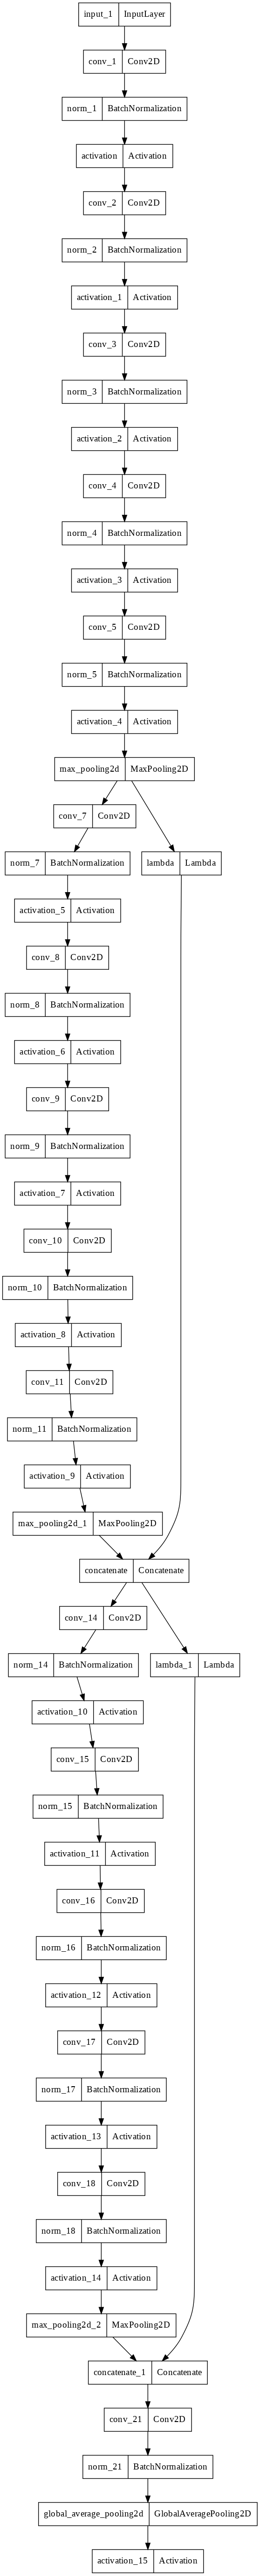

In [63]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=False,dpi=100)